In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [93]:
import numpy as np
from scipy.misc import imread, imsave, toimage, fromimage
from PIL import Image, ImageOps

In [42]:
BASE = '../GatoPerro/train'
WIDTH = HEIGHT = 256
def load_and_crop_image(filename, target_size):
    return ImageOps.fit(Image.open(filename), target_size)
gatos = np.array([fromimage(load_and_crop_image(BASE+'/cat.{:04}.jpg'.format(i), (WIDTH, HEIGHT))) for i in range(100)])
perros = np.array([fromimage(load_and_crop_image(BASE+'/dog.{:04}.jpg'.format(i), (WIDTH, HEIGHT))) for i in range(100)])

In [45]:
imagenes = np.concatenate((gatos, perros), axis=0)
labels = np.zeros(len(gatos) + len(perros), dtype=int)
labels[:len(gatos)] = 1

In [46]:
brightness = np.mean(imagenes, axis=(1,2,3))

In [51]:
bright_dogs = np.flatnonzero((brightness > 150) & (labels == 0))
dark_cats = np.flatnonzero((brightness < 100) & (labels == 1))

In [84]:
len(bright_dogs), len(dark_cats)

(4, 35)

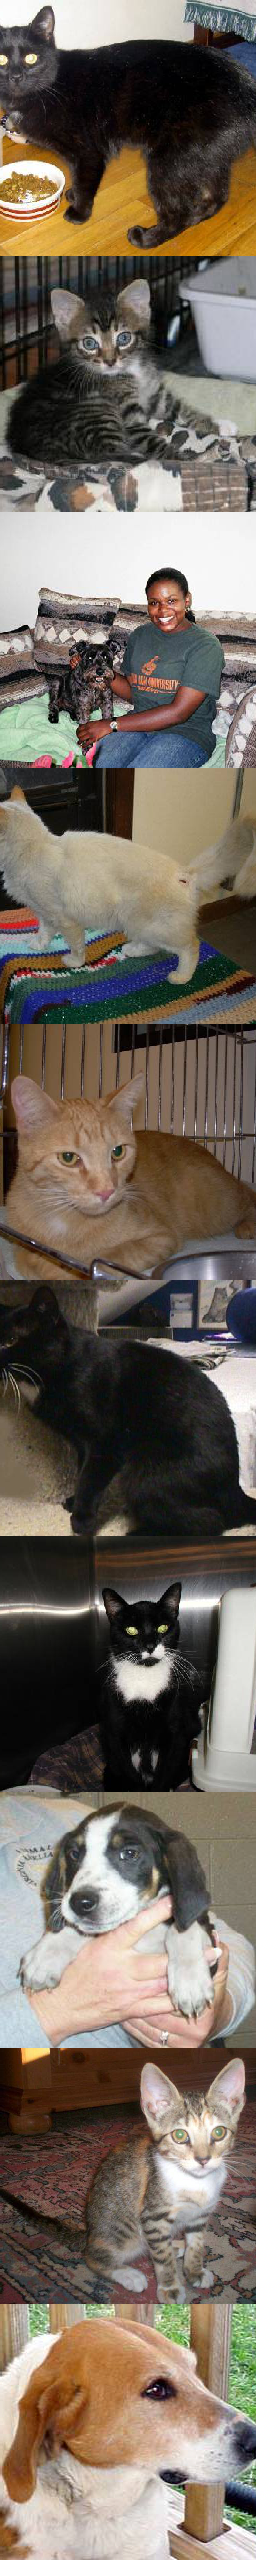

In [126]:
np.random.seed(1)
dog_images = np.random.choice(bright_dogs, 3, replace=False)
cat_images = np.random.choice(dark_cats, 7, replace=False)
first_set_of_images = np.concatenate((dog_images, cat_images))
np.random.shuffle(first_set_of_images)
np.random.shuffle(first_set_of_images)
toimage(np.concatenate(imagenes[first_set_of_images], axis=0))

In [92]:
%pwd

'/Users/kcarnold/code/clubdl/notebooks'

In [127]:
feats = []
true = []
for i, idx in enumerate(first_set_of_images):
    imsave('img_{:02}.jpg'.format(i), imagenes[idx])
    feats.append([1, labels[idx] - .5 + np.random.standard_normal()*.1, brightness[idx]])
    true.append(labels[idx])
true = np.array(true)
feats = np.array(feats)

In [128]:
with open('page.html','w') as f:
    print('''<style>div { page-break-after: always; }</style>''', file=f)
    for i, feat in enumerate(feats):
        print('<div><h1>{}</h1>'.format(i+1), file=f)
        print('<img src="img_{:02}.jpg"> {}</div>'.format(i, np.round(feat, 2)), file=f)

In [129]:
import pandas as pd

In [130]:
#weights = np.array([100, 1., -1.])
weights = np.array([-1, 0, 0])
weights = np.array([-1, 0, 1])
predicted = np.dot(feats, weights)
pd.DataFrame.from_items([
        ('true', true),
        ('predicted', predicted),
        ('correct', true == (predicted > 0))])

,true,predicted,correct
0,1,83.346161,True
1,1,93.676941,True
2,0,153.467489,False
3,1,98.896866,True
4,1,89.513056,True
5,1,57.779139,True
6,1,62.366948,True
7,0,158.755000,False
8,1,89.102661,True
9,0,153.264191,False
